In this notebook we plot the albedo function in the 0D EBM.

In [1]:
# Imports 

# Custom Code
from plotting import *
from EBM import *

# Standard packages
import numpy as np

## Setting Save Location

In [2]:
plot_save_dir = '/Users/cfn18/Documents/PhD-Work/Thesis/img/L96-EBM/'
ensure_directory_exists(plot_save_dir)

## Plotting Albedo Ramp + R_I vs R_O

In [3]:
(TSI*0.8)/(0.6 * capacity)

0.0001735873015873016

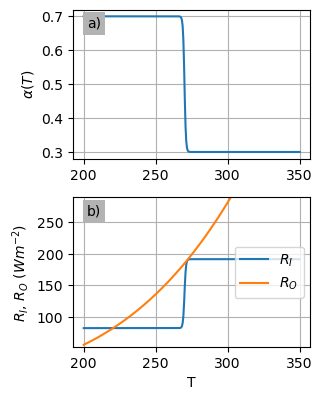

In [4]:
Ts = np.linspace(200, 350, 300)

fig, axes = init_2d_fax(nrows=2)

ax = axes[0]
alphas = albedo(Ts)
ax.plot(Ts, alphas)
# ax.set_xlabel('T')
ax.set_ylabel('$\\alpha(T)$')

ax = axes[1]
RIs = R_I(Ts, TSI=TSI*.8)
ROs = R_O(Ts)
ax.plot(Ts, RIs, label='$R_{I}$')
ax.plot(Ts, ROs, label='$R_{O}$')
ax.set_xlabel('T')
ax.set_ylabel('$R_{I}$, $R_{O}$ $(Wm^{-2})$')
ax.set_ylim(R_I(200) - 50, R_I(300) + 50)
ax.legend(loc=7)
fig.tight_layout()
plt.show()


# save_name = plot_save_dir + '/albedo-ramp-and-RI-vs-RO.pdf'
# fig.savefig(save_name)
# plt.show()
# print(save_name)

# Plotting Potential

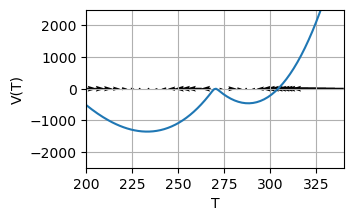

In [15]:
fig, ax = init_2d_fax()
Ts = np.linspace(200, 340, 140)

ax.plot(Ts, -potential(Ts) + potential(270))
plt.xlim(200, 340)
plt.ylim(-2500, 2500)
ax.set_xlabel('T')
ax.set_ylabel('V(T)')
Ts = np.linspace(200, 340, 30)
flow_field = np.gradient(potential(Ts), Ts)
plt.quiver(Ts, np.full_like(Ts, 0), flow_field/1000, np.full_like(Ts, 0))
plt.show()

plt.show()

[288.06782656]
[233.07686709]


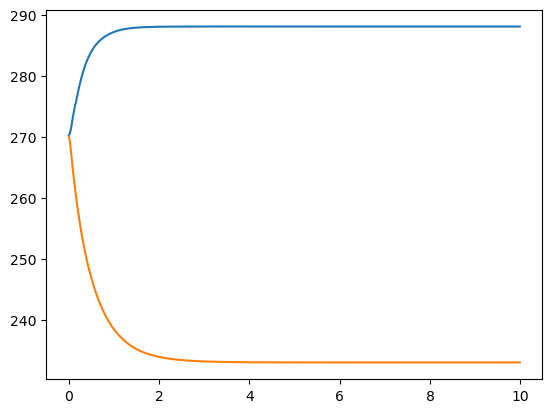

In [14]:
from scipy.integrate import solve_ivp

for T0 in [270.3, 270.]:
    T = 10
    sol = solve_ivp(ebm_rhs, (0, T), [T0],  dense_output=True, method='LSODA')
    time = np.arange(0, T, 0.01)
    soln = sol.sol(time).T
    print(soln[-1])

    plt.plot(time, soln)
plt.show()